# Important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Titanic Dataset

1. Handling Missing Data in Titanic Dataset
   - Task:Identify and handle missing values in the Titanic dataset. Experiment with different strategies such as mean/median imputation, mode imputation, and dropping rows/columns.
   - Dataset: Titanic Dataset


In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.shape

(891, 15)

### 1. Drop row and columns

In [ ]:
# droping deck column because in this column we have 688 missing values
# in this case values imputation lead wrong prediction by model
titanic = titanic.drop(columns=['deck'])

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


**Drop Row**

In [ ]:
# Drop rows with any missing values
titanic_dropped_rows = titanic.dropna()
titanic_dropped_rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


### Mean/MediunMean/Median imputation

In [ ]:
# mean imputation
titanic['age'].fillna(titanic['age'], inplace=True)

# We can also use median for null values imputations
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

### Mode Imputation

In [ ]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

In [ ]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace = True)

### Verifying Changes

In [ ]:
missing_values = titanic.isnull().sum()
missing_values

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# 2. Car Evaluation Dataset Load

2. Encoding Categorical Variables in a Car Evaluation Dataset
   - Task: Encode categorical variables in the Car Evaluation dataset using one-hot encoding and label encoding. Compare the results.
   - Dataset: Car Evaluation Dataset


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_evaluation = pd.read_csv(url, names=column_names)
car_evaluation.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
car_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
car_evaluation.shape

(1728, 7)

In [ ]:
cat_columns = car_evaluation.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_columns)

Categorical columns: Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [ ]:
one_hot = pd.get_dummies(car_evaluation, columns=cat_columns)
print("One-Hot Encoded Data:")
print(one_hot.head())

One-Hot Encoded Data:
   buying_high  buying_low  buying_med  buying_vhigh  maint_high  maint_low  \
0        False       False       False          True       False      False   
1        False       False       False          True       False      False   
2        False       False       False          True       False      False   
3        False       False       False          True       False      False   
4        False       False       False          True       False      False   

   maint_med  maint_vhigh  doors_2  doors_3  ...  lug_boot_big  lug_boot_med  \
0      False         True     True    False  ...         False         False   
1      False         True     True    False  ...         False         False   
2      False         True     True    False  ...         False         False   
3      False         True     True    False  ...         False          True   
4      False         True     True    False  ...         False          True   

   lug_boot_small  saf

**One hot encoding Creates binary columns for each unique category value.**

### Label Encoding

In [ ]:
# Label Encoding
label_encoders = {}
car_data_label_encoded = car_evaluation.copy()

for column in cat_columns:
    label_encoders[column] = LabelEncoder()
    car_data_label_encoded[column] = label_encoders[column].fit_transform(car_evaluation[column])

print("Label Encoded Data:")
print(car_data_label_encoded.head())

Label Encoded Data:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


**Label encoding Converts categories to numeric labels. This method maintains the original number of columns.**

### Result Comparison

In [ ]:
print("Shape of Original data: ", car_evaluation.shape)
print("Shape of One-Hot Encoded data: ", one_hot.shape)
print("Shape of Label Encoded data: ", car_data_label_encoded.shape)

Shape of Original data:  (1728, 7)
Shape of One-Hot Encoded data:  (1728, 25)
Shape of Label Encoded data:  (1728, 7)


# 3. Wine Quality Dataset


3. Scaling Features in the Wine Quality Dataset
   - Task: Apply normalization and standardization to the features in the Wine Quality dataset. Analyze how scaling affects the distribution of data.
   - Dataset: Wine Quality Dataset


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_quality = pd.read_csv(url, sep=';')

# Display the first 5 rows of the dataset
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


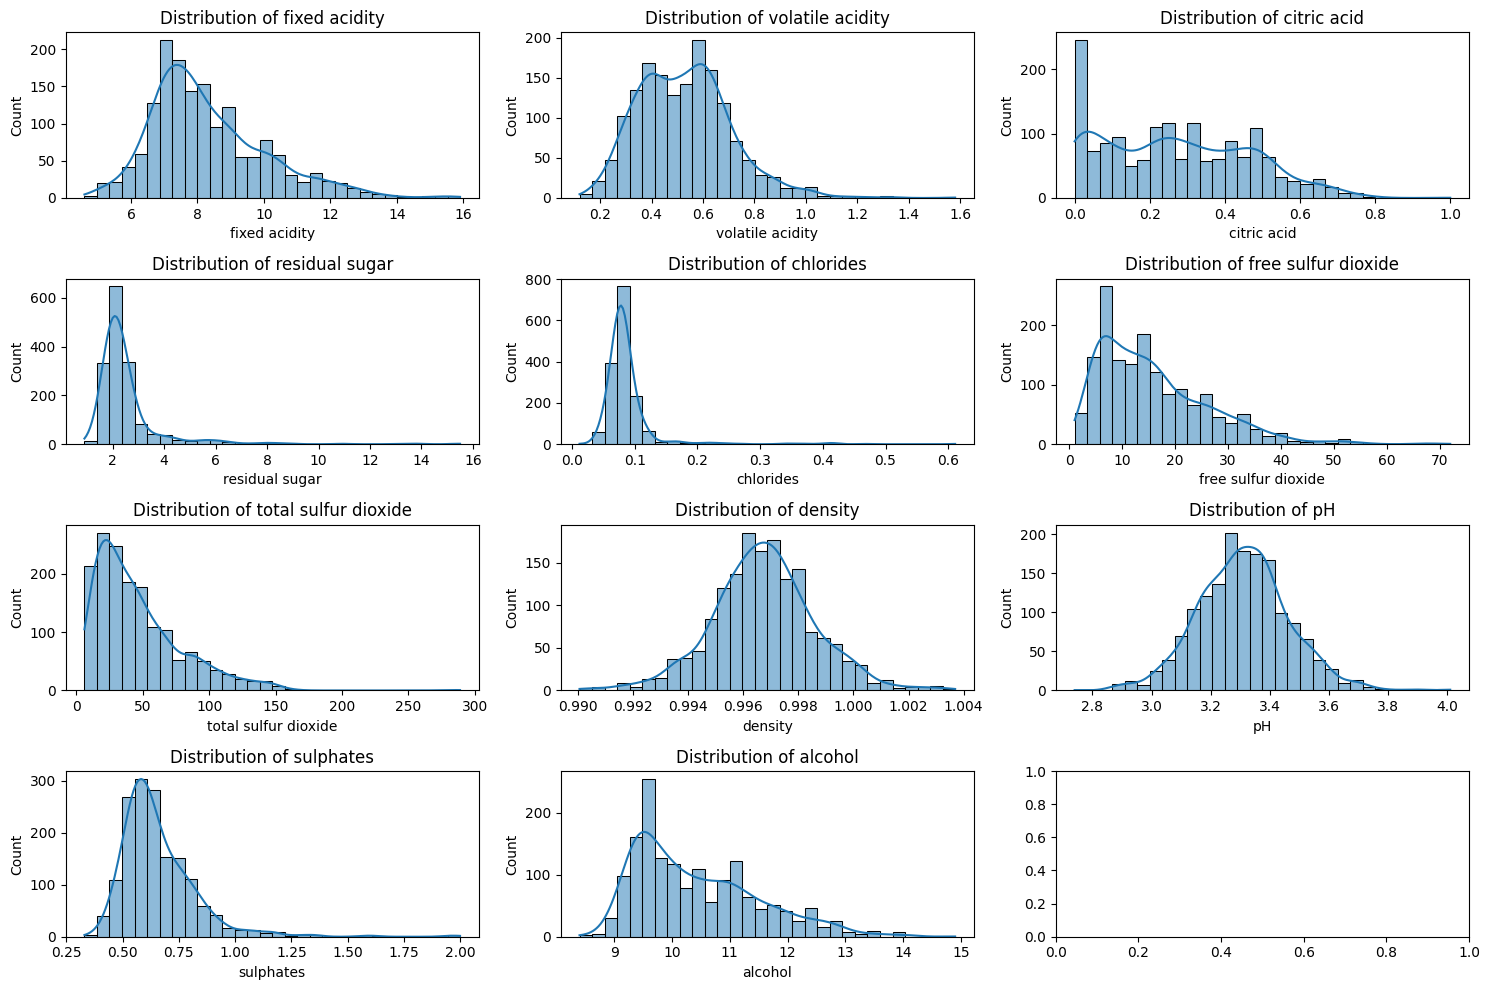

In [ ]:
# Plot the distribution of each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(wine_quality.columns[:-1]):
    sns.histplot(wine_quality[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


### Standardization

**Standardization:**
- Standardizing the features will center the data around a mean of 0 and scale it to have a standard deviation of 1

In [ ]:
scaler = StandardScaler()
wine_quality_standardized = wine_quality.copy() #create the copy of dataset
wine_quality_standardized[wine_quality.columns[:-1]] = scaler.fit_transform(wine_quality[wine_quality.columns[:-1]])  # Exclude the 'quality' last column

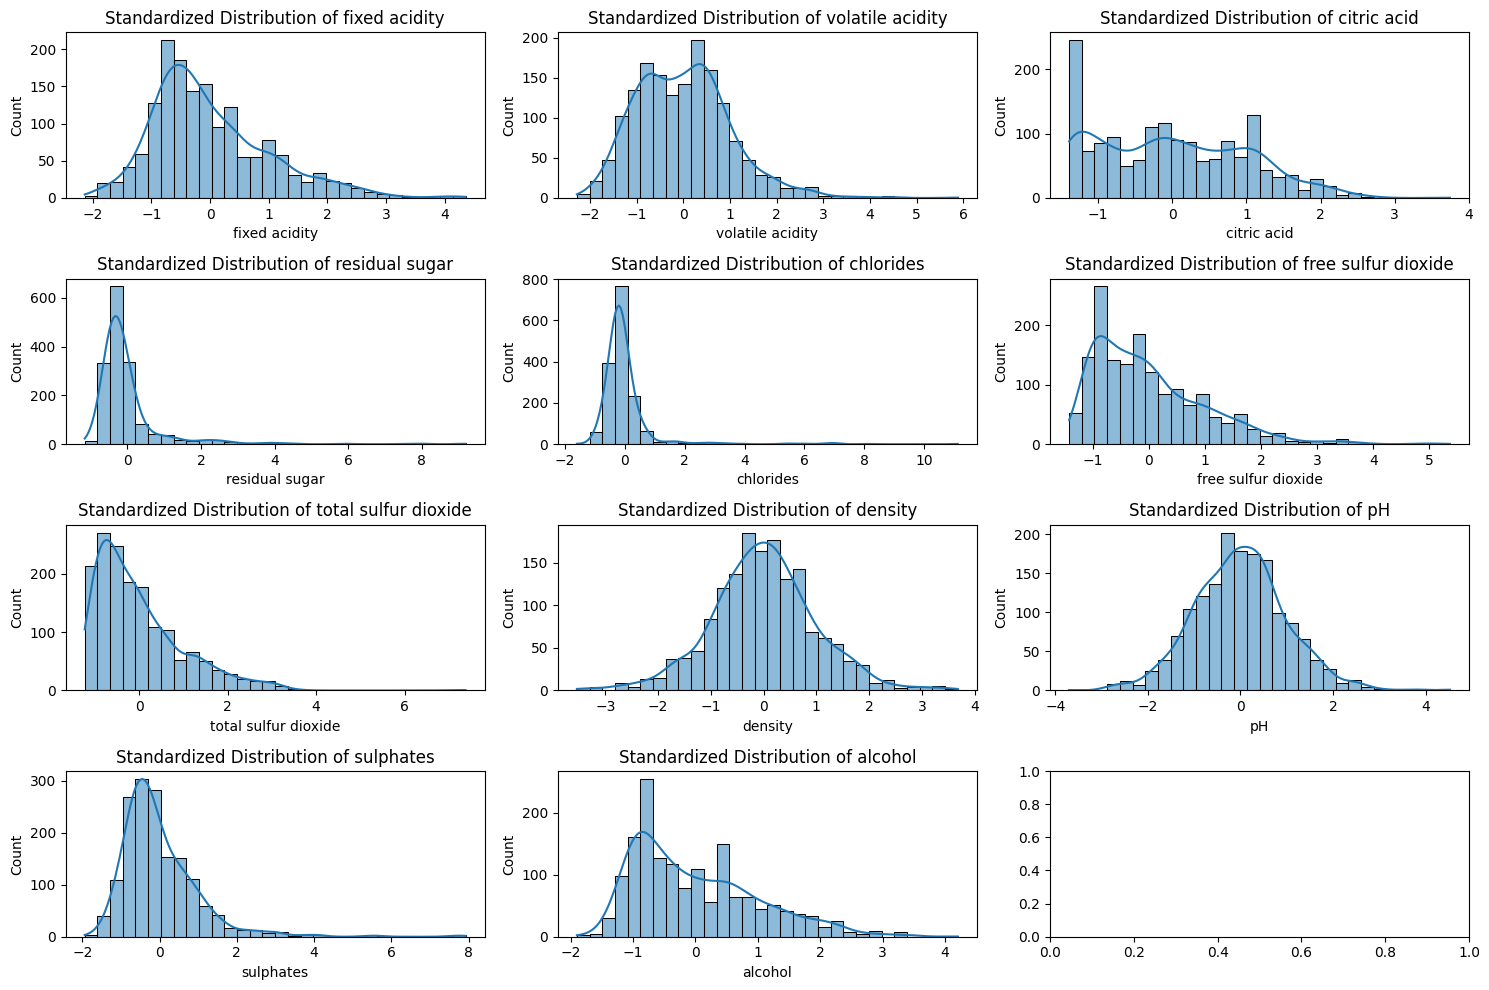

In [ ]:
# Distribution plot of Standarized data

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(wine_quality.columns[:-1]):  # Exclude the 'quality' column
    sns.histplot(wine_quality_standardized[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Standardized Distribution of {col}')

plt.tight_layout()
plt.show()

### Normalization

**Normalization:**
- Normalizing the features will scale the data to a range between 0 and 1.

In [ ]:
# Normalization
scaler = MinMaxScaler()
wine_quality_normalized = wine_quality.copy()
wine_quality_normalized[wine_quality.columns[:-1]] = scaler.fit_transform(wine_quality[wine_quality.columns[:-1]]) #excluding quality column

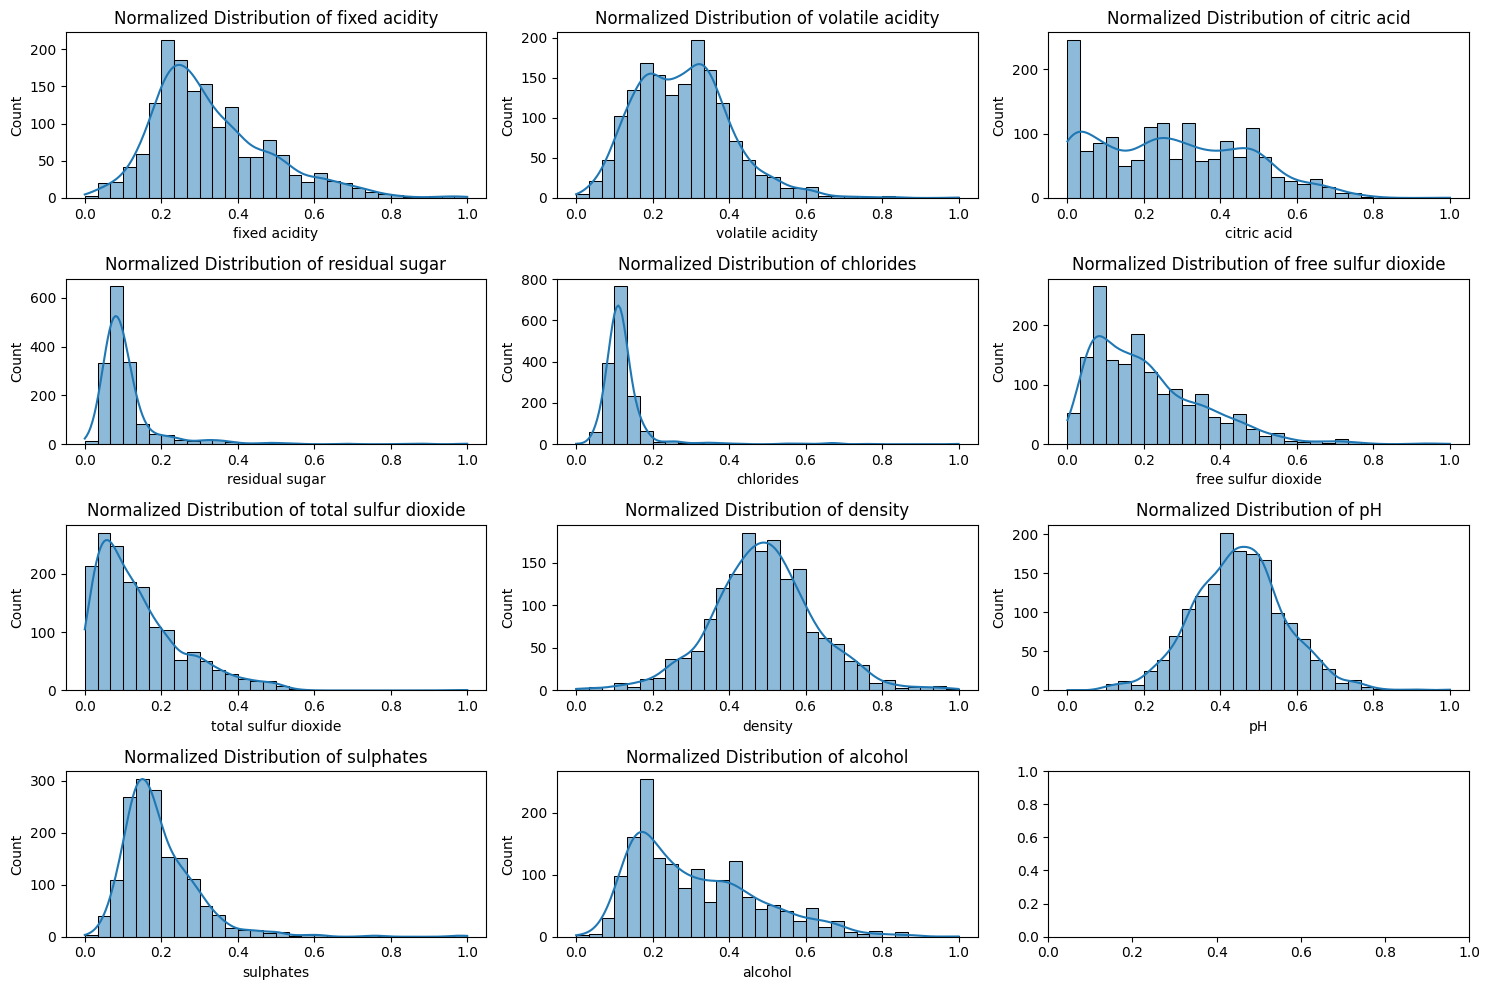

In [ ]:
# Plot the distribution of each normalized feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(wine_quality.columns[:-1]):  # Exclude the 'quality' column
    sns.histplot(wine_quality_normalized[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Normalized Distribution of {col}')

plt.tight_layout()
plt.show()

### Comparison

**By visualizing the distributions**

**Standardization** keeps the original distribution shape but changes the scale to have a mean of 0 and a standard deviation of 1.

**Normalization,** on the other hand, adjusts all values to fit within the range of 0 to 1.








# 4. Boston Housing Dataset

4. Handling Outliers in the Boston Housing Dataset
   - Task: Identify and handle outliers in the Boston Housing dataset using techniques like Z-score, IQR, and visualization methods.
   - Dataset: Boston Housing Dataset


In [ ]:
from scipy.stats import zscore

In [31]:
# Load the Boston Housing dataset
df = pd.read_csv('/content/HousingData.csv')

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [33]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics of the dataset:")
print(df.describe())


Missing values in each column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Basic statistics of the dataset:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000

In [34]:
df.shape

(506, 14)

In [35]:
df = df.dropna()

In [37]:
df.isnull().sum()
df.shape

(394, 14)

### Z-score Method

In [38]:
z_scores = np.abs(zscore(df))
outliers_z = (z_scores > 3).sum(axis=1)
print("\nNumber of outliers identified by Z-score method:")
print((outliers_z > 0).sum())


Number of outliers identified by Z-score method:
76


In [42]:
# Remove Outliers using Z-score
df_no_outliers_z = df[(z_scores < 3).all(axis=1)]
print("\nShape of dataset after removing outliers using Z-score method:")
print(df_no_outliers_z.shape)


Shape of dataset after removing outliers using Z-score method:
(318, 14)


### IQR Method

In [39]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [40]:
outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum(axis=1)
print("\nNumber of outliers identified by IQR method:")
print((outliers_iqr > 0).sum())


Number of outliers identified by IQR method:
180


In [43]:
# Remove Outliers using IQR
df_no_outliers_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nShape of dataset after removing outliers using IQR method:")
print(df_no_outliers_iqr.shape)


Shape of dataset after removing outliers using IQR method:
(214, 14)


### Visualization Methods

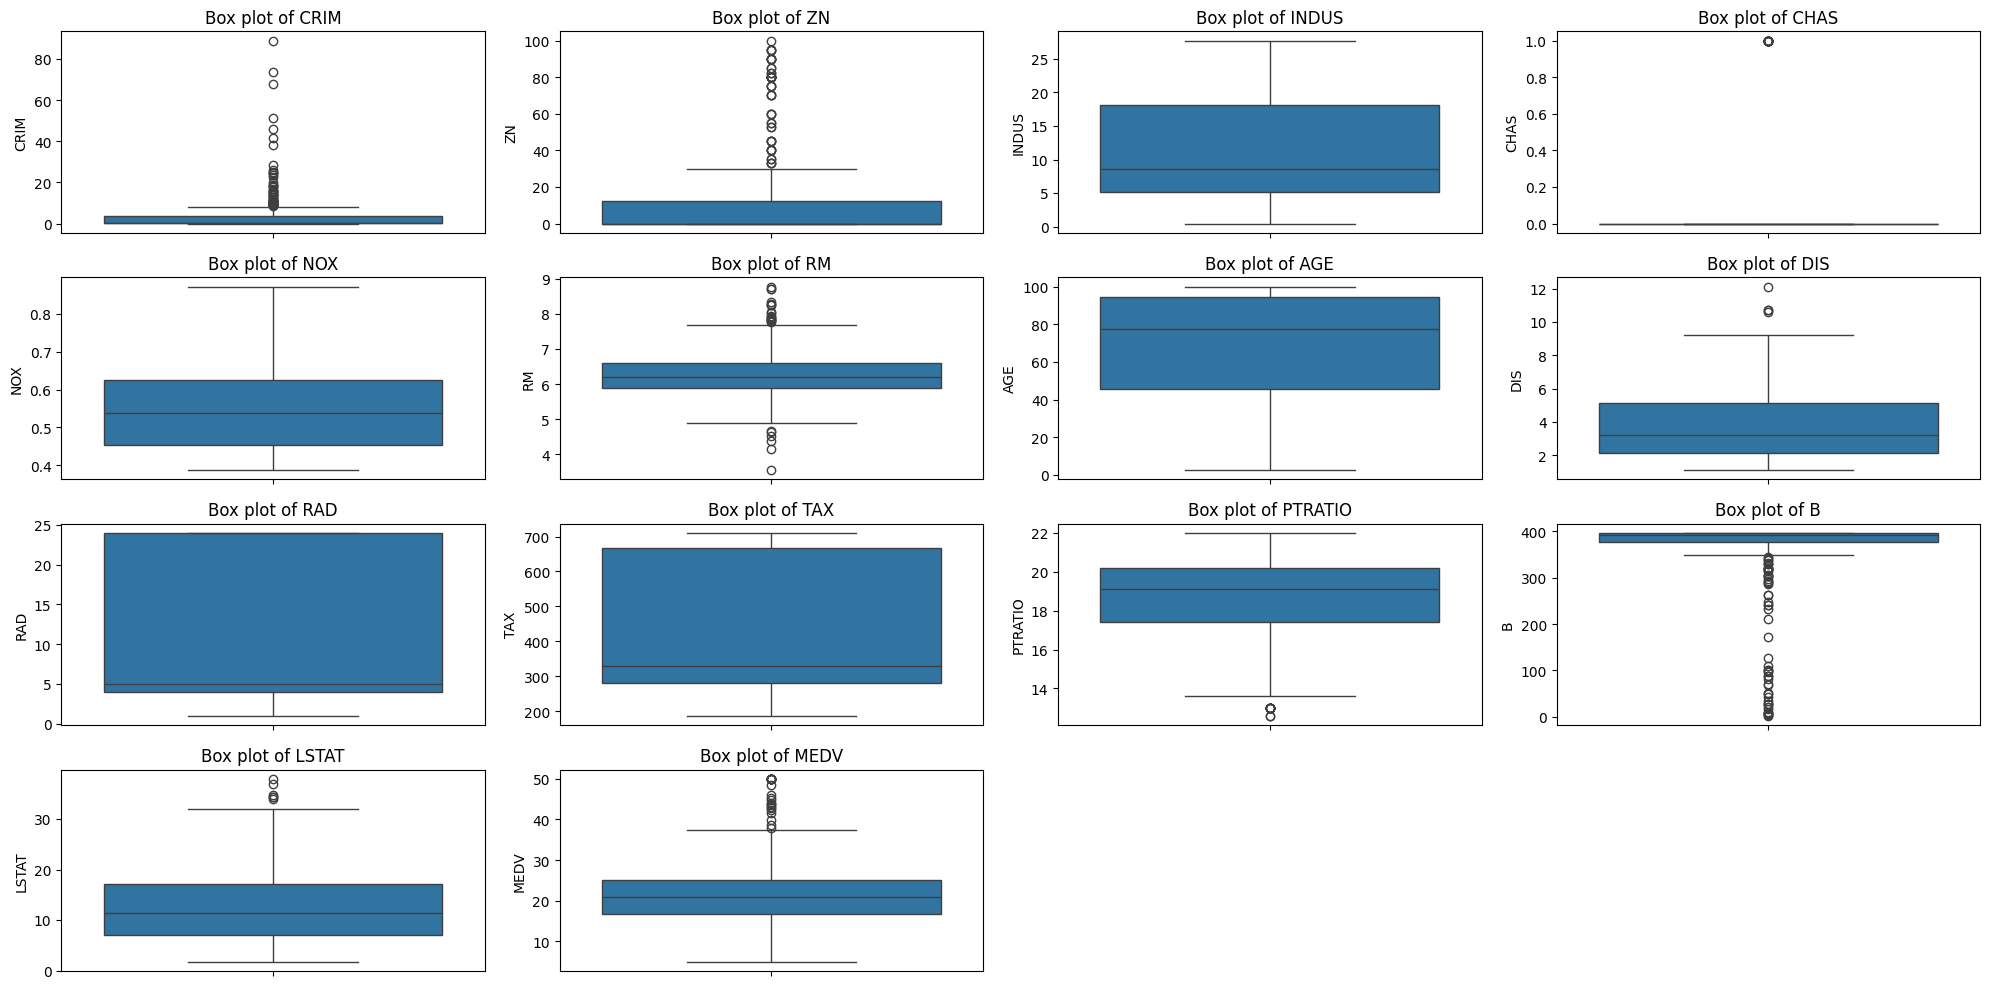

In [41]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [46]:
df_replaced_outliers_z = df.copy()   #copy of the datasets


for col in df.columns:
    # Calculate the median for the current column
    median = df_replaced_outliers_z[col].median()

    # Get the index for the current column
    col_index = df.columns.get_loc(col)

    # Replace outliers with the median
    df_replaced_outliers_z[col] = np.where(z_scores[:, col_index] > 3, median, df_replaced_outliers_z[col])


InvalidIndexError: (slice(None, None, None), 0)

# 5. Retail Sales Dataset


5. Data Imputation in the Retail Sales Dataset
   - Task: Handle missing values in the Retail Sales dataset using advanced imputation techniques like KNN imputation and MICE.
   - Dataset: Retail Sales Dataset


In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=6bd9d90ad1860b01e8bb94d5ef9c497392ee7d44fe2566e110785a67d611f4bf
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=f53fce196c0c65419758d382265d159eed94e1432270cb355358714e495d9238
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from sklearn.impute import KNNImputer
from fancyimpute import IterativeImputer

In [ ]:
sales_data = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
sales_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
sales_data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# 6. Heart Disease Dataset

6. Feature Engineering in the Heart Disease Dataset
   - Task: Create new features from existing ones in the Heart Disease dataset, such as age groups, cholesterol levels, and more.
   - Dataset: Heart Disease Dataset


In [ ]:
# Load the Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
heart_disease = pd.read_csv(url, names=columns)

In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Create new Features

In [ ]:
#new feature for age group

bins = [0,35,50,65,100]
labels = ['Young', 'Middle', 'Senior', 'Old']
heart_disease['age_group'] = pd.cut(heart_disease['age'], bins=bins, labels=labels)

In [ ]:
# new feature for cholesterols level

heart_disease['cholesterol_level'] = pd.cut(heart_disease['chol'], bins=[0,200, 239, 400], labels=['Low', 'normal', 'High'])

In [ ]:
# creating new feature for blood pressure level

heart_disease['bp_level'] = pd.cut(heart_disease['trestbps'], bins=[0,120,140,200], labels=['Low', 'Normal', 'High'])

In [ ]:
print("Dataset With new features")
heart_disease.head()

Dataset With new features


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,cholesterol_level,bp_level
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Senior,normal,High
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Old,High,High
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Old,normal,Low
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Middle,High,Normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Middle,normal,Normal


# 7. Bike Sharing Dataset

7. Transforming Variables in the Bike Sharing Dataset
   - Task: Apply transformations like log, square root, and Box-Cox transformations to skewed variables in the Bike Sharing dataset.
   - Dataset: Bike Sharing Dataset


In [47]:
from scipy.stats import boxcox

# 8. Diabetes Dataset

8. Feature Selection in the Diabetes Dataset
   - Task: Use techniques like correlation analysis, mutual information, and recursive feature elimination (RFE) to select important features in the Diabetes dataset.
   - Dataset: Diabetes Dataset


# 9. Credit Card Fraud Detection Dataset

9. Dealing with Imbalanced Data in the Credit Card Fraud Detection Dataset
   - Task: Handle imbalanced data in the Credit Card Fraud Detection dataset using techniques like SMOTE, ADASYN, and undersampling.
   - Dataset: Credit Card Fraud Detection Dataset


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print("\nClass Distribution:")
print(data['Class'].value_counts())


Class Distribution:
Class
0.0    13897
1.0       56
Name: count, dtype: int64


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
data = data.dropna()
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Split the dataset into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


##  Handle Imbalanced Data

### Smote

SMOTE: Generate synthetic samples for the minority class

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### ADASYN

ADASYN: Generate synthetic samples with a focus on harder-to-learn examples.

In [ ]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

### Undersampling

Undersampling: Randomly remove samples from the majority class.

In [ ]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [ ]:
# Checking the class distribution after resampling
print("\nClass Distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

print("\nClass Distribution after ADASYN:")
print(pd.Series(y_train_adasyn).value_counts())

print("\nClass Distribution after Undersampling:")
print(pd.Series(y_train_under).value_counts())


Class Distribution after SMOTE:
Class
0.0    9728
1.0    9728
Name: count, dtype: int64

Class Distribution after ADASYN:
Class
0.0    9728
1.0    9719
Name: count, dtype: int64

Class Distribution after Undersampling:
Class
0.0    39
1.0    39
Name: count, dtype: int64


**Function Define for Model evaluation**

In [ ]:
# Function with differenct parameters call

def evaluate_model(X_train, y_train, X_test, y_test, model_name):
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"\n{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [ ]:
evaluate_model(X_train_smote, y_train_smote, X_test, y_test, "SMOTE")


SMOTE - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4169
         1.0       0.38      0.88      0.53        17

    accuracy                           0.99      4186
   macro avg       0.69      0.94      0.76      4186
weighted avg       1.00      0.99      0.99      4186


SMOTE - Confusion Matrix:
[[4144   25]
 [   2   15]]


In [ ]:
evaluate_model(X_train_adasyn, y_train_adasyn, X_test, y_test, "ADASYN")


ADASYN - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4169
         1.0       0.31      0.88      0.45        17

    accuracy                           0.99      4186
   macro avg       0.65      0.94      0.73      4186
weighted avg       1.00      0.99      0.99      4186


ADASYN - Confusion Matrix:
[[4135   34]
 [   2   15]]


In [ ]:
evaluate_model(X_train_under, y_train_under, X_test, y_test, "Undersampling")


Undersampling - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      4169
         1.0       0.10      0.94      0.18        17

    accuracy                           0.97      4186
   macro avg       0.55      0.95      0.58      4186
weighted avg       1.00      0.97      0.98      4186


Undersampling - Confusion Matrix:
[[4025  144]
 [   1   16]]


## Conclusion

In this case **Smoke** is best because by using smoke model got 99% accuracy and have a low number of True Negative values As compare to the **Undersampling** and **Adasyn**

# 10. Movie Lens Dataset

10. Combining Multiple Datasets in the Movie Lens Dataset
    - Task: Combine and preprocess multiple related datasets from the Movie Lens dataset, such as ratings, user information, and movie metadata.
    - Dataset: Movie Lens Dataset


In [ ]:
# Load the Movie Lens datasets
ratings = pd.read_csv('/content/ratings.csv')
movies = pd.read_csv('/content/movies.csv')
tags = pd.read_csv('/content/tags.csv')

In [ ]:
print("Ratings Dataset:")
ratings.head()


Ratings Dataset:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
print("\nMovies Dataset:")
movies.head()


Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
print("\tags Dataset:")
tags.head()


	ags Dataset:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [ ]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

### Merge the Dataset

In [ ]:
# Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='movieId', how='left')

# Merge the combined dataset with users
full_data = pd.merge(ratings_movies, tags, on='userId', how='left')

# Display the first few rows of the combined dataset
print("\nCombined Dataset:")
full_data.head()



Combined Dataset:


,userId,movieId_x,rating,timestamp_x,title,genres,movieId_y,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,NaN,NaN,NaN
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN,NaN,NaN
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN,NaN,NaN


### Preprocess

In [ ]:
full_data.shape

(4706485, 9)

In [ ]:
full_data.isnull().sum()

userId             0
movieId_x          0
rating             0
timestamp_x        0
title              0
genres             0
movieId_y      79619
tag            79619
timestamp_y    79619
dtype: int64

In [ ]:
full_data = full_data.dropna()

In [ ]:
full_data.isnull().sum()

userId         0
movieId_x      0
rating         0
timestamp_x    0
title          0
genres         0
movieId_y      0
tag            0
timestamp_y    0
dtype: int64

In [ ]:
print("\nPreprocessed Dataset:")
full_data.head()


Preprocessed Dataset:


,userId,movieId_x,rating,timestamp_x,title,genres,movieId_y,tag,timestamp_y
232,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama,60756.0,funny,1.445715e+09
233,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama,60756.0,Highly quotable,1.445715e+09
234,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama,60756.0,will ferrell,1.445715e+09
235,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama,89774.0,Boxing story,1.445715e+09
236,2,318,3.0,1445714835,"Shawshank Redemption, The (1994)",Crime|Drama,89774.0,MMA,1.445715e+09
